In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Notes

### Confidence intervals
Boxell 2022 computed 95% confidence intervals following Imbens and Kolesar (2016). They used a particular R library `dfadjust` and a function called `dfadjustSE` to computed adjusted standard error, and then multiplied by 1.96 to obtain the lower and upper bounds of the confidence interval. Since there is no library equivalent to `dfadjustSE` in Python, this notebook computes a 95% confidence interval using the standard error produced by the `scipy.stats.linregress` function.

### Rounding differences
Boxell 2022 slopes might by slightly different from the slopes produced in this notebook due to rounding differences. For example, Python will 0.725 will be rounded down to 0.72 (nearest even), whereas Boxell may show this value as 0.73.

### Slope issues
Boxell 2022 displays all of their graphs from 1965 to 2020. Accordingly, the regression lines are fit to only the data points that are visible on the graph. However, in some cases, the slope value that is shown on the graph differs from the slope of the line that is actually drawn, because the calculated slope is using data points from before 1965. In this notebook, the slopes that are displayed are the slopes of the regression line on the shown graph (calculated using data points from 1965 onwards).

In [2]:
def clean_data(raw_years, raw_data):
    years = []
    data = []
    for y, d in zip(raw_years, raw_data):
        # Boxell 2022 limits data from 1965 onwards
        # To add the limit of 1965, replace the if condition with the following:
        # if int(y) >= 1965 and d != "" and not pd.isnull(d):
        if d != "" and not pd.isnull(d):
            years.append(int(y))
            data.append(float(d))
    return years, data

In [3]:
def custom_plot(x, y, name):
    m, b, _, p, e = stats.linregress(x, y)
    plt.plot(x, m*np.array(x) + b, color="red")
    plt.scatter(x, y)
    plt.xlim(1960, 2025)
    if x[0] >= 1965:
        plt.xticks([1980, 2000, 2020])
    else:
        plt.xticks(np.arange(x[0] - 10, 2020, step=20))
    lower, upper = plt.ylim()
    text_ypos = lower + 0.8 * (upper - lower)
    lower_confidence_interval, upper_confidence_interval = m - 1.96 * e,  m + 1.96 * e # 95% confidence interval
    plt.text(1966, text_ypos, f"Slope: {m:.2f}\n({lower_confidence_interval:.2f}, {upper_confidence_interval:.2f})\np-value: {p:.2f}")
    plt.ylabel(name)
    plt.xlabel("Years")
    plt.title(f"{name} vs. Years")
    plt.show()

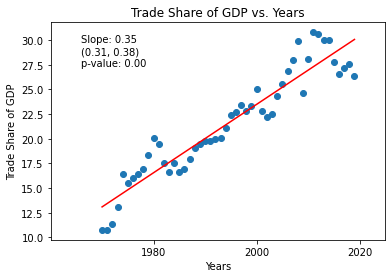

In [4]:
# Trade Share of GDP

# Data sourced from boxell22_data/drivers/trade/data.csv for the United States
raw_trade_years = ["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
raw_trade_data = ["","","","","","","","","","","10.7582854049602","10.7571790359274","11.3406196496001","13.0792857463575","16.4449863225396","15.5163736331565","16.0488456356637","16.4178946751554","16.9728342289651","18.3761942714554","20.1098446894226","19.4259071131591","17.5368122809184","16.6655934803103","17.522432189514","16.603906126303","16.8979771514343","17.9735809845702","19.0701007058615","19.4151283860195","19.8150505840543","19.7864481240974","19.9505945023923","20.0446187019752","21.0554591617453","22.4533816490568","22.6870719902412","23.4283210752957","22.8258909297017","23.2734726597002","25.0436352248928","22.8429578317059","22.1542717779622","22.4771005698784","24.3524067400051","25.5559940404642","26.9001486081178","27.955802072559","29.8867980581803","24.6415634555134","28.0579522804396","30.7892940559817","30.5681839448303","30.0130072244039","29.9688503643777","27.7367718305336","26.5140005953439","27.1423202420193","27.5644232320362","26.3887267872481",""]
custom_plot(*clean_data(raw_trade_years, raw_trade_data), "Trade Share of GDP")

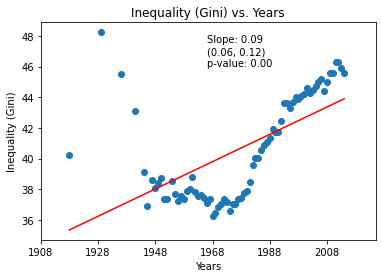

In [5]:
# Inequality (Gini)
# Slope issue

# Data sourced from boxell22_data/drivers/inequality/data1.csv for the United States
raw_inequality_years = [1918, 1929, 1936, 1941, 1944, 1945, 1947, 1948, 1949, 1950, 1951, 1952, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
raw_inequality_data = [40.26, 48.24, 45.54, 43.12, 39.15, 36.9, 38.61, 38.07, 38.43, 38.7, 37.35, 37.35, 38.52, 37.71, 37.26, 37.53, 37.35, 37.89, 37.98, 38.79, 37.8, 37.53, 37.62, 37.44, 37.08, 37.35, 36.25, 36.45, 36.85, 37.05, 37.35, 37.15, 36.55, 37.05, 37.05, 37.35, 37.45, 37.75, 37.85, 38.45, 39.55, 40.05, 40.05, 40.55, 40.85, 41.05, 41.35, 41.95, 41.75, 41.75, 42.45, 43.6, 43.6, 43.3, 43.7, 44, 43.9, 44.1, 44.2, 44.6, 44.3, 44.5, 44.7, 45, 45.2, 44.4, 45, 45.6, 45.6, 46.3, 46.3, 45.9, 45.6]
custom_plot(*clean_data(raw_inequality_years, raw_inequality_data), "Inequality (Gini)")

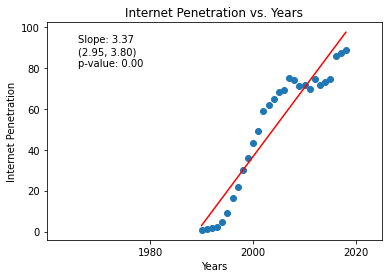

In [6]:
# Internet Penetration

# Data sourced from boxell22_data/drivers/internet/data.csv for the United States
raw_internet_years = ["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
raw_internet_data = ["","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","0.784728502","1.163193726","1.724202539","2.271673294","4.862780635","9.237088297","16.41935296","21.61640097","30.09319659","35.84872446","43.07916264","49.08083159","58.78540388","61.69711712","64.75825648","67.96805292","68.93119327","75","74","71","71.69","69.72946076","74.7","71.4","73","74.55420245","85.54442129","87.27488917","88.49890317","",""]
custom_plot(*clean_data(raw_internet_years, raw_internet_data), "Internet Penetration")

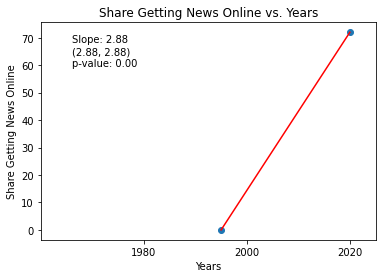

In [7]:
# Share Getting News Online

# Data sourced from boxell22_data/drivers/reutersnews/internet_data.xlsx for country = "United States", source = "online (including social media)"
raw_news_online_years = [1995, 2020]
raw_news_online_data = [0, 72]
custom_plot(*clean_data(raw_news_online_years, raw_news_online_data), "Share Getting News Online")

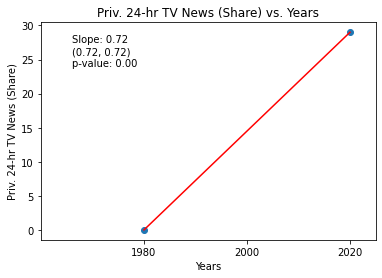

In [8]:
# Priv. 24-hr TV News (Share)
# Rounding difference

# Data sourced from boxell22_data/drivers/reutersnews/data.xlsx for United States for maximum share value where private_cable=yes
raw_priv_24_news_share_years = [1980, 2020]
raw_priv_24_news_share_data = [0, 29]
custom_plot(*clean_data(raw_priv_24_news_share_years, raw_priv_24_news_share_data), "Priv. 24-hr TV News (Share)")

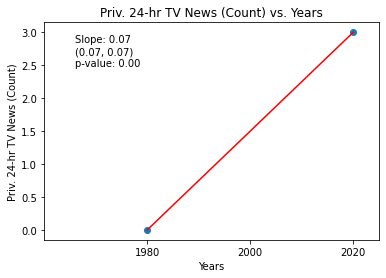

In [9]:
# Priv. 24-hr TV News (Count)
# Rounding difference

# Data sourced from boxell22_data/drivers/reutersnews/data.xlsx for United States for number of outlets where private_cable=yes
raw_priv_24_news_count_years = [1980, 2020]
raw_priv_24_news_count_data = [0, 3]
custom_plot(*clean_data(raw_priv_24_news_count_years, raw_priv_24_news_count_data), "Priv. 24-hr TV News (Count)")

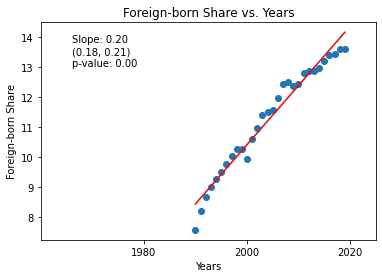

In [10]:
# Foreign-born Share

raw_percentage_df = pd.read_csv("boxell22_data/drivers/immigration/percentage.csv")
raw_percentage_df = raw_percentage_df.loc[raw_percentage_df["LOCATION"] == "USA"]
percentage_years = raw_percentage_df["TIME"].values
percentage_data = raw_percentage_df["Value"].values

# Data sourced from boxell22_data/drivers/immigration/population.csv for the United States
raw_population_years = ["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
raw_population_data = ["180671000","183691000","186538000","189242000","191889000","194303000","196560000","198712000","200706000","202677000","205052000","207661000","209896000","211909000","213854000","215973000","218035000","220239000","222585000","225055000","227225000","229466000","231664000","233792000","235825000","237924000","240133000","242289000","244499000","246819000","249623000","252981000","256514000","259919000","263126000","266278000","269394000","272657000","275854000","279040000","282162411","284968955","287625193","290107933","292805298","295516599","298379912","301231207","304093966","306771529","309321666","311556874","313830990","315993715","318301008","320635163","322941311","324985539","326687501","328239523",""]
population_years, population_data = clean_data(raw_population_years, raw_population_data)

raw_stock_df = pd.read_csv("boxell22_data/drivers/immigration/stock1.csv")
raw_stock_df = raw_stock_df.loc[raw_stock_df["LOCATION"] == "USA"]
stock_years = raw_stock_df["TIME"].values
stock_data = raw_stock_df["Value"].values

percentage_df = pd.DataFrame({"year": percentage_years, "percentage": percentage_data})
population_df = pd.DataFrame({"year": population_years, "population": population_data})
stock_df = pd.DataFrame({"year": stock_years, "stock": stock_data})

immigration_df = percentage_df.merge(population_df, on=["year"], how="outer").merge(stock_df, on=["year"], how="outer").sort_values(by="year").reset_index(drop=True)
immigration_df["immigration"] = immigration_df["stock"] / immigration_df["population"] * 100

# Rescale percentage data by adding a scalar constant to match the imputed immigration data on average
mask1 = pd.notnull(immigration_df["percentage"]) & pd.notnull(immigration_df["immigration"])
add_constant = np.mean(immigration_df.loc[mask1, "immigration"] - immigration_df.loc[mask1, "percentage"])
mask2 = pd.notnull(immigration_df["percentage"]) & pd.isnull(immigration_df["immigration"])
immigration_df.loc[mask2, "immigration"] = immigration_df.loc[mask2, "percentage"] + add_constant

custom_plot(*clean_data(immigration_df["year"].values, immigration_df["immigration"].values), "Foreign-born Share")

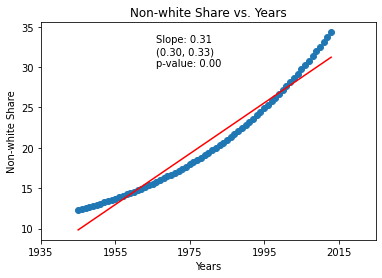

In [12]:
# Non-white Share
# Slope issue

raw_ethnic_df = pd.read_excel("boxell22_data/drivers/hief/replication/HIEF_dataset-master/data/ethnic fractionalization - original.xlsx")
raw_ethnic_df = raw_ethnic_df.loc[raw_ethnic_df["Country"] == "United States of America", ["Year", "Group Name", "Group Estimate"]].drop_duplicates()
raw_ethnic_df["white"] = (raw_ethnic_df["Group Name"] == "white").astype(int)
raw_ethnic_df["nonwhite_estimate"] = raw_ethnic_df["Group Estimate"] * (1 - raw_ethnic_df["white"])
ethnic_df = raw_ethnic_df.loc[:, ["Year", "Group Estimate", "nonwhite_estimate"]].groupby("Year").apply(sum)

nonwhite_years = ethnic_df["nonwhite_estimate"].to_dict().keys()
nonwhite_data = ethnic_df["nonwhite_estimate"].to_dict().values()
custom_plot(*clean_data(nonwhite_years, nonwhite_data), "Non-white Share")

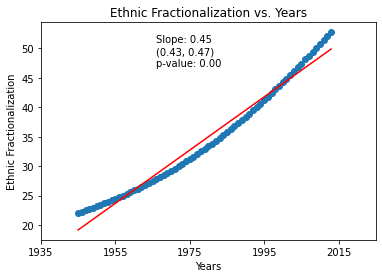

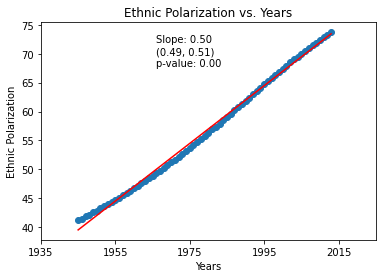

In [13]:
# Ethnic Fractionalization and Polarization
# Slope issue on both

hief_df = pd.read_excel("boxell22_data/drivers/hief/replication/HIEF_dataset-master/results/HIEF_dataset_v2.xlsx")
hief_df = hief_df.loc[hief_df["Country"] == "United States of America"]
hief_df["EF_index"] = np.round(hief_df["EF_index"] * 100, 1)
hief_df["EP_index"] = np.round(hief_df["EP_index"] * 100, 1)

ethnic_years = hief_df["Year"].values
ethnic_fractionalization_data = hief_df["EF_index"].values
ethnic_polarization_data = hief_df["EP_index"].values
custom_plot(*clean_data(ethnic_years, ethnic_fractionalization_data), "Ethnic Fractionalization")
custom_plot(*clean_data(ethnic_years, ethnic_polarization_data), "Ethnic Polarization")

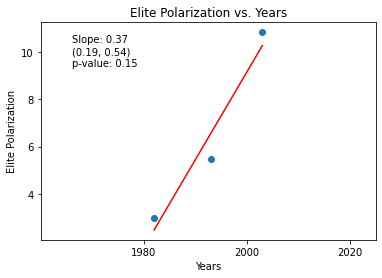

In [14]:
# Elite polarization

elite_df = pd.read_stata("boxell22_data/drivers/rehmreilly/robin_best_polarization.dta")
elite_df = elite_df.loc[elite_df["ccode"] == "USA", ["year", "adj_P_expert_1"]]
elite_df["year"] = elite_df["year"].apply(lambda x: x.year)
elite_df["value"] = elite_df["adj_P_expert_1"] * 100
custom_plot(*clean_data(elite_df["year"].values, elite_df["value"].values), "Elite Polarization")

In [15]:
# ANES Data Preparation

raw_df = pd.read_csv("anes_timeseries_cdf_csv_20211118/anes_timeseries_cdf_csv_20211118.csv", low_memory=False)
vars = {
    "VCF0004": "year",
    # "VCF0302": "party",
    "VCF0301": "party",
    "VCF0803": "ideo",
    "VCF0009z": "weightz",
    "VCF0218": "thermo_democratparty",
    "VCF0224": "thermo_republicanparty"
}
df = raw_df.loc[:, vars.keys()]
df.rename(columns=vars, inplace=True)
# df["party"] = df["party"].replace([" ", "0", "2", "3", "4", "8", "9", "5", "1"], [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1, 2]) # 5 = Democrat, 1 = Republican
df["party"] = df["party"].replace([" ", "0"], np.nan).transform(lambda x: 1 if pd.notnull(x) and int(x) < 4 else 2 if pd.notnull(x) and int(x) > 4 else np.nan)
df["ideo"] = df["ideo"].replace([" ", "0", "9"], np.nan)
df["weightz"] = pd.to_numeric(df["weightz"].replace([" "], np.nan))
df["thermo_democratparty"] = pd.to_numeric(df["thermo_democratparty"].replace([" ", "98", "99"], np.nan))
df["thermo_republicanparty"] = pd.to_numeric(df["thermo_republicanparty"].replace([" ", "98", "99"], np.nan))

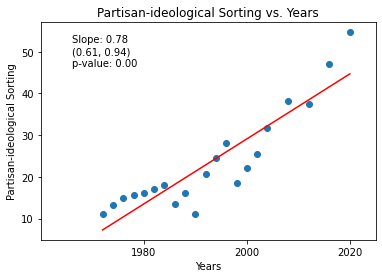

In [16]:
# Partisan-ideological sorting

# Notes for why this graph may be different from Boxell 2022. Data points appear to align, but slope is calculated to be different.
# - Different regression models used between R (https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm) and Python (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
# - Boxell 2022 only considers data from 1978 onwards, whereas this notebook also includes data from 1972, 74, 76
#     - It is possible that these years were dropped due to slight differences in preprocessing in Boxell 2022

from sklearn.linear_model import LinearRegression

years = []
r2 = []

def model(data):
    lm = LinearRegression()
    lm.fit(data["ideo"].values.reshape(-1, 1), data["party"].values.reshape(-1, 1), data["weightz"].values)
    r2.append(lm.score(data["ideo"].values.reshape(-1, 1), data["party"].values.reshape(-1, 1), data["weightz"].values))

data = df.dropna(subset=["party", "ideo", "weightz"])
data = data[(data["ideo"] != 4)]
for year in data["year"].unique():
    temp = data.loc[data["year"] == year, :]
    temp = temp[pd.notnull(temp["party"])]
    years.append(year)
    model(temp.loc[pd.notnull(temp["party"]), :])

custom_plot(years, np.array(r2) * 100, "Partisan-ideological Sorting")

In [17]:
# Affective Polarization
# Boxell 2017 formula calculates affective polarization as two separate values:
#     - (dem_thermometer - rep_thermometer) for democrats
#     - (rep_thermometer - dem_thermometer) for republicans, and takes the sum of those two values.
# Boxell 2022 formula calculates affective polarization as the in-group affect (an individual's feeling towards their own party) minus
#     out-group affect (an individual's feeling towards the other party). This is based on Iyengar 2019.

datap = df.dropna(subset=["party", "ideo", "thermo_democratparty", "thermo_republicanparty", "weightz"])
dem = (datap["party"] == 1)
rep = (datap["party"] == 2)

datap.insert(0, "polar", None)
dem_in_group = datap.loc[dem, "thermo_democratparty"]
dem_out_group = datap.loc[dem, "thermo_republicanparty"]
rep_in_group = datap.loc[rep, "thermo_republicanparty"]
rep_out_group = datap.loc[rep, "thermo_democratparty"]
datap.loc[:, "in_group"] = np.where(datap["party"] == 1, datap["thermo_democratparty"], datap["thermo_republicanparty"])
datap.loc[:, "out_group"] = np.where(datap["party"] == 2, datap["thermo_democratparty"], datap["thermo_republicanparty"])
datap.loc[:, "polar"] = datap["in_group"] - datap["out_group"]
wmp = lambda x: np.average(x["polar"], weights=datap.loc[x["polar"].index, "weightz"])
avg_datap = datap.groupby("year").apply(wmp).groupby("year").apply(sum)

/tmp/ipykernel_2141/2841904751.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datap.loc[:, "in_group"] = np.where(datap["party"] == 1, datap["thermo_democratparty"], datap["thermo_republicanparty"])
/tmp/ipykernel_2141/2841904751.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datap.loc[:, "out_group"] = np.where(datap["party"] == 2, datap["thermo_democratparty"], datap["thermo_republicanparty"])
/tmp/ipykernel_2141/2841904751.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy 

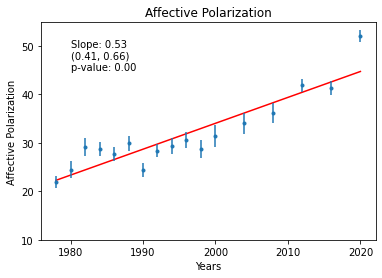

In [18]:
number_of_responses_by_year = datap.groupby("year").size()
errorbar = {}
for d in datap.values:
    year = d[1]
    weight = d[4]
    if year not in errorbar:
        errorbar[year] = 0
    errorbar[year] += np.square(weight / number_of_responses_by_year[year]) * avg_datap[year] * 100

for year in errorbar:
    errorbar[year] = np.sqrt(errorbar[year])

x = np.array([int(a) for a in dict(avg_datap).keys()])
y = list(dict(avg_datap).values())
m, b, _, p, e = stats.linregress(x, y)
plt.plot(x, m*x + b, color="red")
plt.errorbar(x, y, yerr=list(errorbar.values()), fmt=".")
plt.title("Affective Polarization")
plt.yticks(np.arange(10, 60, step=10))
plt.xlabel("Years")
plt.ylabel("Affective Polarization")
lower_confidence_interval, upper_confidence_interval = m - 1.96 * e,  m + 1.96 * e # 95% confidence interval
plt.text(1980, 45, f"Slope: {m:.2f}\n({lower_confidence_interval:.2f}, {upper_confidence_interval:.2f})\np-value: {p:.2f}")
plt.show()
print()